# Initial imports for EDA and ML models

In [3279]:
import warnings 
warnings.filterwarnings("ignore")

In [3280]:
import os
import pandas as pd 
import sys
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import seaborn as sns
import math
import datetime as dt

Statistic functions and models

In [3281]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

Sklearn

In [3282]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE

Clustering (Unsupervised Learning) - modules

In [3283]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

Modifying the output text in the print function:
    Example: print(color.BOLD + 'Hello world!' + color.END)

In [3284]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# Intro to Case Study

X education is an online Education Compnay that provides educational video and content to its consumers, mainly industry professional.

The existing Lead conversion of their sales team is 30%. Our objective is to bring this to 80% by identifying the Hot Leads(Leads that have a better chance of conversion). Thus, by identifying Hot Leads, the sales team does not waste its time and resources in Less important leads.

# Importing Data

In [3285]:
Leads=pd.read_csv("Leads.csv")

# Primary Data Summary

In [3286]:
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3287]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [3288]:
Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Primary Data Cleaning

In [3289]:
# Null value percentage of all variables

Leads.isnull().sum()/len(Leads)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [3290]:
# Substituting null value in the variables with mode of their respective columns 

Leads["Lead Source"].loc[Leads["Lead Source"].isnull()] = Leads["Lead Source"].mode()
Leads["TotalVisits"].loc[Leads["TotalVisits"].isnull()] = Leads["TotalVisits"].mode()
Leads["Page Views Per Visit"].loc[Leads["Page Views Per Visit"].isnull()] = Leads["Page Views Per Visit"].mode()
Leads["Last Activity"].loc[Leads["Last Activity"].isnull()] = Leads["Last Activity"].mode()

# Uni-variate and Bi-Variate Analysis 

### Last Notable Activity

In [3291]:
Leads["Last Notable Activity"].value_counts(dropna=False,normalize=True)

Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Email Received                  0.000108
Approached upfront              0.000108
Resubscribed to emails          0.000108
View in browser link Clicked    0.000108
Form Submitted on Website       0.000108
Name: Last Notable Activity, dtype: float64

In [3292]:
round(Leads.groupby("Last Notable Activity")["Converted"].sum()/Leads.groupby("Last Notable Activity")["Converted"].count(),2).sort_values(ascending=False)

Last Notable Activity
Approached upfront              1.00
Email Marked Spam               1.00
Email Received                  1.00
Resubscribed to emails          1.00
Had a Phone Conversation        0.93
SMS Sent                        0.69
Unreachable                     0.69
Email Opened                    0.37
Unsubscribed                    0.30
Page Visited on Website         0.29
Email Link Clicked              0.26
Modified                        0.23
Email Bounced                   0.15
Olark Chat Conversation         0.14
Form Submitted on Website       0.00
View in browser link Clicked    0.00
Name: Converted, dtype: float64

#### Inference from Last Notable Activity

- The number of events where the customer is approached upfront and having a phone conversation is very low. It also takes a lot more resources. But it has a better chance of lead conversion.
- Surprisingly customers who marked the emails as spam produce a higher Conversion rate.
- The Form displayed on website does not produce any lead conversion 

### Lead Origin

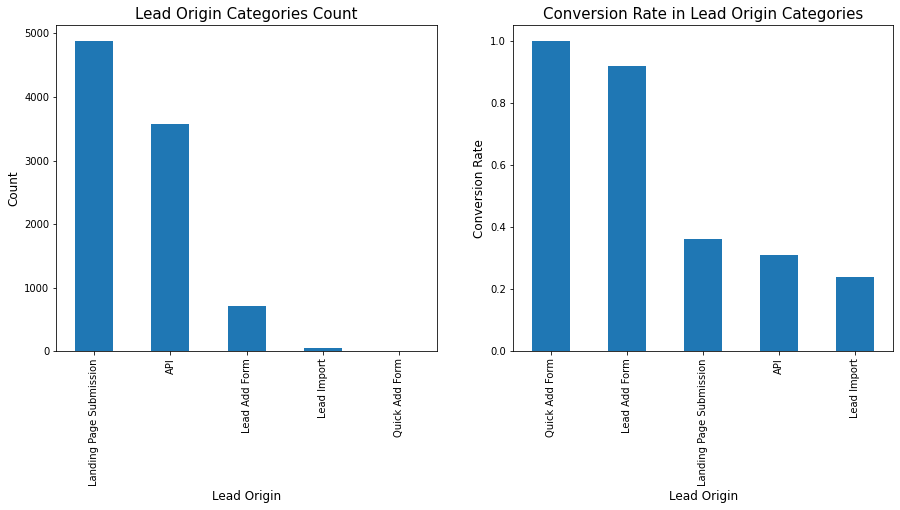

In [3293]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
Leads["Lead Origin"].value_counts(dropna=False).plot(kind="bar")
plt.title("Lead Origin Categories Count",size=15)
plt.ylabel("Count",size=12)
plt.xlabel("Lead Origin",size=12)

# Conversion Rate in Lead Origin Categories
plt.subplot(1,2,2)
round(Leads.groupby("Lead Origin")["Converted"].sum()/Leads.groupby("Lead Origin")["Converted"].count(),2).sort_values(ascending=False).plot(kind="bar")
plt.title("Conversion Rate in Lead Origin Categories",size=15)
plt.ylabel("Conversion Rate",size=12)
plt.xlabel("Lead Origin",size=12)
plt.show()

#### Inference of Lead Origin

- The conversion rate due to Lead Add Form is good and may want to give the "Quick Add Form" a try to get a better understanding

### Lead Source

In [3294]:
Leads["Lead Source"].value_counts(normalize=True)

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Social Media         0.000217
Live Chat            0.000217
Press_Release        0.000217
WeLearn              0.000109
Pay per Click Ads    0.000109
youtubechannel       0.000109
testone              0.000109
NC_EDM               0.000109
welearnblog_Home     0.000109
blog                 0.000109
Name: Lead Source, dtype: float64

In [3295]:
# Rmoving null value rows of "Page Views Per Visit"
Leads=Leads[~(Leads["Lead Source"].isnull())]

# Convert very low percentage values into Others
searchfor=['Welingak Website',
 'Referral Sites',
 'Facebook',
 'bing',
 'google',
 'Click2call',
 'Social Media',
 'Live Chat',
 'Pay per Click Ads',
 'NC_EDM',
 'Press_Release',
 'testone',
 'WeLearn',
 'welearnblog_Home',
 'blog',
 'youtubechannel']
Leads["Lead Source"].loc[Leads["Lead Source"].str.contains('|'.join(searchfor))] = "Others"

In [3296]:
round(Leads.groupby("Lead Source")["Converted"].sum()/Leads.groupby("Lead Source")["Converted"].count(),2).sort_values(ascending=False)

Lead Source
Reference         0.92
Others            0.55
Google            0.40
Organic Search    0.38
Direct Traffic    0.32
Olark Chat        0.26
Name: Converted, dtype: float64

### Lead Quality vs Conversion Rate

In [3297]:
Leads["Lead Quality"].value_counts()

Might be             1545
Not Sure             1090
High in Relevance     632
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [3298]:
round(Leads.groupby("Lead Quality")["Converted"].sum()/Leads.groupby("Lead Quality")["Converted"].count(),2).sort_values(ascending=False)

Lead Quality
High in Relevance    0.95
Low in Relevance     0.82
Might be             0.76
Not Sure             0.24
Worst                0.02
Name: Converted, dtype: float64

#### Renaming the values in the column according to Conversion rate
Using the values of % of people converted in each category of Lead Quality,
    We are able to find out that Lead conversion % is great in "Low in Relevance" Category. Therefore, we are combining "Low in Relevance" category with "Might be"     category as both have a close Conversion rate.

In [3299]:
# Changing the names of categories in Lead Quality
# Combining the "Low in Relevance" and "Might be" sector into one "Good"

Leads["Lead Quality"].loc[Leads["Lead Quality"]=="High in Relevance"]="V_Good"
Leads["Lead Quality"].loc[(Leads["Lead Quality"]=="Low in Relevance") | (Leads["Lead Quality"]=="Might be")]="Good"
Leads["Lead Quality"].loc[Leads["Lead Quality"]=="Not Sure"]="Bad"
Leads["Lead Quality"].loc[Leads["Lead Quality"]=="Worst"]="Worst"

Text(0.5, 0, 'Lead Quality')

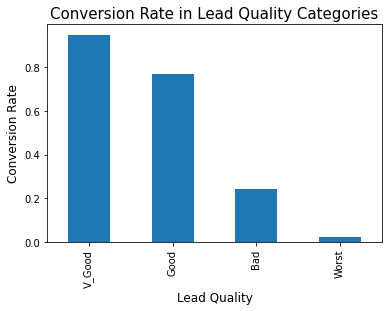

In [3300]:
#visual display of conversion rate in Lead Quality category

round(Leads.groupby("Lead Quality")["Converted"].sum()/Leads.groupby("Lead Quality")["Converted"].count(),2).sort_values(ascending=False).plot(kind="bar")
plt.title("Conversion Rate in Lead Quality Categories",size=15)
plt.ylabel("Conversion Rate",size=12)
plt.xlabel("Lead Quality",size=12)

In [3301]:
print("Converted Lead % in 'Null value' Lead Quality   : ", Leads[Leads["Lead Quality"].isnull()].Converted.value_counts(normalize=True).loc[1]*100)

Converted Lead % in 'Null value' Lead Quality   :  21.291815695350305


In [3302]:
Leads["Lead Quality"].loc[Leads["Lead Quality"].isnull()]="Others"

#### Inference of Lead Quality
- Performing a small manipulation in the Categories updated by the sales team gives a great change in Conversion rate. Thus the sales team can make the second call wisely

### Lead Profile vs Conversion rate

In [3303]:
Leads["Lead Profile"].value_counts()

Select                         4115
Potential Lead                 1608
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [3304]:
# Converting all of imperfect entries of null values
Leads["Lead Profile"].loc[Leads["Lead Profile"]=="Select"]= np.nan

In [3305]:
# The conversion rate in each category of Lead Profile
round(Leads.groupby("Lead Profile")["Converted"].sum()/Leads.groupby("Lead Profile")["Converted"].count(),2).sort_values(ascending=False)

Lead Profile
Dual Specialization Student    1.00
Lateral Student                0.96
Potential Lead                 0.78
Other Leads                    0.37
Student of SomeSchool          0.04
Name: Converted, dtype: float64

In [3306]:
Leads[Leads["Lead Profile"].isnull()]["Converted"].sum()/Leads[Leads["Lead Profile"].isnull()]["Converted"].count()

0.298651817116061

### City vs Conversion rate 

In [3307]:
Leads.City.value_counts(normalize=True)

Mumbai                         0.413669
Select                         0.284943
Thane & Outskirts              0.096480
Other Cities                   0.088129
Other Cities of Maharashtra    0.058582
Other Metro Cities             0.048690
Tier II Cities                 0.009507
Name: City, dtype: float64

In [3308]:
Leads.City.loc[(Leads.City.isnull()) | (Leads.City=="Select")]="Mumbai"
Leads.City.loc[Leads.City=="Tier II Cities"]="Other Cities"

In [3309]:
round(Leads.groupby("City")["Converted"].sum()/Leads.groupby("City")["Converted"].count(),2).sort_values(ascending=False)

City
Thane & Outskirts              0.45
Other Cities of Maharashtra    0.44
Other Metro Cities             0.41
Other Cities                   0.40
Mumbai                         0.37
Name: Converted, dtype: float64

#### Inference from City vs Conversion rate
- There is not much difference in comversion rate along different cities. It is consistent around 40% over all cities.

### Tags vs Conversion rate

In [3310]:
Leads.Tags.isnull().sum()

3342

In [3311]:
Leads.Tags.loc[Leads.Tags.isnull()]="Others"

In [3312]:
Leads.Tags.value_counts()

Others                                               3342
Will revert after reading the email                  2052
Ringing                                              1200
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          174
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with 

In [3313]:
# Grouping together all the categories that constitute less than 2 % of the Tags varaible

searchfor=['Interested  in full time MBA',
 'Graduation in progress',
 'invalid number',
 'Diploma holder (Not Eligible)',
 'wrong number given',
 'opp hangup',
 'number not provided',
 'in touch with EINS',
 'Lost to Others',
 'Still Thinking',
 'Want to take admission but has financial problems',
 'Interested in Next batch',
 'In confusion whether part time or DLP',
 'Lateral student',
 'University not recognized',
 'Shall take in the next coming month',
 'Recognition issue (DEC approval)']
Leads.Tags.loc[Leads.Tags.str.contains('|'.join(searchfor))]="Others"
Leads.Tags.loc[Leads.Tags=="Diploma holder (Not Eligible)"]="Others"
Leads.Tags.loc[Leads.Tags=="Recognition issue (DEC approval)"]="Others"

In [3314]:
# Lead Converion rate of different categories of "Tags"
round(Leads.groupby("Tags")["Converted"].sum()/Leads.groupby("Tags")["Converted"].count(),2).sort_values(ascending=False)

Tags
Closed by Horizzon                     0.99
Lost to EINS                           0.98
Will revert after reading the email    0.97
Busy                                   0.56
Others                                 0.22
Interested in other courses            0.03
Ringing                                0.03
switched off                           0.02
Already a student                      0.01
Not doing further education            0.01
Name: Converted, dtype: float64

#### Inference from Tags
- Will revert after reading the mail has an extraordinary count and conversion rate. Have to engage these leads properly.
- Closed by Horizon and Lost to EINS also has a great conversion rate

### Website traffic by Customer vs Conversion rate

The Website traffic of a customer is affected by three variables : TotalVisits, "Total Time Spent on Website", "Page Views Per Visit". 

<AxesSubplot:>

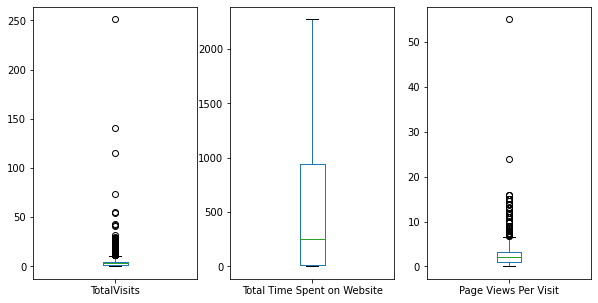

In [3315]:
plt.figure(figsize=[10,5])
plt.subplot(1,3,1)
Leads.TotalVisits.plot(kind="box")

plt.subplot(1,3,2)
Leads["Total Time Spent on Website"].plot(kind="box")

plt.subplot(1,3,3)
Leads["Page Views Per Visit"].plot(kind="box")

#### Outliers management

In [3316]:
Leads.TotalVisits.describe([0.25,0.5,0.75,0.9,0.95,0.98,0.99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
98%        13.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [3317]:
Leads["Page Views Per Visit"].describe([0.25,0.5,0.75,0.9,0.95,0.98,0.99])

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
90%         5.000000
95%         6.000000
98%         8.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [3318]:
Leads["Total Time Spent on Website"].describe([0.25,0.5,0.75,0.9,0.95,0.98,0.99])

count    9204.000000
mean      489.005541
std       547.980340
min         0.000000
25%        14.000000
50%       250.000000
75%       938.000000
90%      1380.000000
95%      1562.000000
98%      1733.880000
99%      1839.970000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [3319]:
# Trimming out the outliers in TotalVisits and "Page Views Per Visit"
Leads=Leads[(Leads.TotalVisits<20) & (Leads["Page Views Per Visit"]<10) & (Leads["Total Time Spent on Website"]<1850)]

### Asymmetrique variables 

In [3320]:
Leads["Asymmetrique Activity Index"].value_counts()

02.Medium    3661
01.High       778
03.Low        357
Name: Asymmetrique Activity Index, dtype: int64

In [3321]:
Leads["Asymmetrique Profile Index"].value_counts()

02.Medium    2683
01.High      2086
03.Low         27
Name: Asymmetrique Profile Index, dtype: int64

<AxesSubplot:>

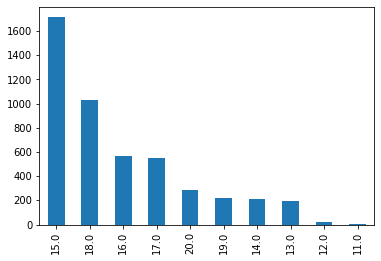

In [3322]:
Leads["Asymmetrique Profile Score"].value_counts().plot(kind="bar")

<AxesSubplot:>

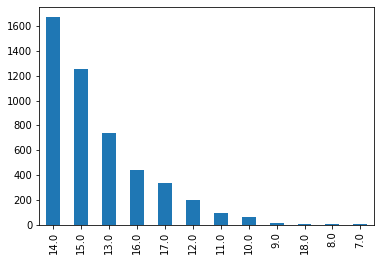

In [3323]:
Leads["Asymmetrique Activity Score"].value_counts().plot(kind="bar")

In [3324]:
Leads.groupby("Asymmetrique Profile Index")["Asymmetrique Profile Score"].value_counts()

Asymmetrique Profile Index  Asymmetrique Profile Score
01.High                     18.0                          1031
                            17.0                           548
                            20.0                           287
                            19.0                           220
02.Medium                   15.0                          1713
                            16.0                           565
                            14.0                           214
                            13.0                           191
03.Low                      12.0                            19
                            11.0                             8
Name: Asymmetrique Profile Score, dtype: int64

In [3325]:
round(Leads.groupby("Asymmetrique Profile Index")["Converted"].sum()/Leads.groupby("Asymmetrique Profile Index")["Converted"].count(),2).sort_values(ascending=False)

Asymmetrique Profile Index
01.High      0.47
03.Low       0.44
02.Medium    0.30
Name: Converted, dtype: float64

In [3326]:
round(Leads.groupby("Asymmetrique Activity Index")["Converted"].sum()/Leads.groupby("Asymmetrique Activity Index")["Converted"].count(),2).sort_values(ascending=False)

Asymmetrique Activity Index
02.Medium    0.42
01.High      0.28
03.Low       0.09
Name: Converted, dtype: float64

In [3327]:
round(Leads.groupby("Asymmetrique Profile Score")["Converted"].sum()/Leads.groupby("Asymmetrique Profile Score")["Converted"].count(),2).sort_values(ascending=False)

Asymmetrique Profile Score
19.0    0.74
20.0    0.70
11.0    0.50
17.0    0.44
12.0    0.42
16.0    0.39
18.0    0.36
15.0    0.28
14.0    0.25
13.0    0.23
Name: Converted, dtype: float64

In [3328]:
round(Leads.groupby("Asymmetrique Activity Score")["Converted"].sum()/Leads.groupby("Asymmetrique Activity Score")["Converted"].count(),2).sort_values(ascending=False)

Asymmetrique Activity Score
15.0    0.64
16.0    0.48
14.0    0.38
13.0    0.13
12.0    0.12
11.0    0.08
10.0    0.05
17.0    0.03
7.0     0.00
8.0     0.00
9.0     0.00
18.0    0.00
Name: Converted, dtype: float64

#### Inference from Asymmetric variables
They make no sense to hold on

### "What matters most to you in choosing a course" variable

In [3329]:
# What matters most to you in choosing a course
Leads["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6216
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

### "What is your current occupation" variable

In [3330]:
# What is your current occupation
Leads["What is your current occupation"].value_counts(dropna=False)

Unemployed              5343
NaN                     2633
Working Professional     659
Student                  204
Other                     14
Housewife                  9
Businessman                7
Name: What is your current occupation, dtype: int64

In [3331]:
Leads["What is your current occupation"].loc[(Leads["What is your current occupation"]=="Housewife") | (Leads["What is your current occupation"]=="Businessman")]="Others"

In [3332]:
Leads["What is your current occupation"].loc[Leads["What is your current occupation"].isnull()]="Unemployed"

In [3333]:
round(Leads.groupby("What is your current occupation")["Converted"].sum()/Leads.groupby("What is your current occupation")["Converted"].count(),2).sort_values(ascending=False)

What is your current occupation
Working Professional    0.92
Others                  0.81
Other                   0.57
Student                 0.35
Unemployed              0.33
Name: Converted, dtype: float64

#### Inference of Current Occupation
- Working Professionals are great Leads. Further Analysis on this category can give a better picture.
- Targetting Digital advertaisemnt towards Housewives and Businessman of the right age group can be given a try. We cannot be sure on such small data, but certainely worth the try

### Country

In [3334]:
Leads["Country"].value_counts(normalize=True)

India                   0.957110
United States           0.010342
United Arab Emirates    0.008061
Singapore               0.003498
Saudi Arabia            0.003194
United Kingdom          0.002281
Australia               0.001977
Qatar                   0.001369
Bahrain                 0.001065
Hong Kong               0.001065
France                  0.000913
Oman                    0.000913
Nigeria                 0.000608
Canada                  0.000608
Germany                 0.000608
Kuwait                  0.000608
South Africa            0.000608
unknown                 0.000608
Sweden                  0.000456
Bangladesh              0.000304
Uganda                  0.000304
Ghana                   0.000304
Italy                   0.000304
Belgium                 0.000304
Philippines             0.000304
China                   0.000304
Asia/Pacific Region     0.000304
Denmark                 0.000152
Tanzania                0.000152
Sri Lanka               0.000152
Vietnam   

In [3335]:
# Converting null values in Country variable to Others
Leads.Country.loc[Leads.Country.isnull()]="Others"

# Convert very low percentage values into Others
searchfor=['United States',
 'United Arab Emirates',
 'Singapore',
 'Saudi Arabia',
 'United Kingdom',
 'Australia',
 'Qatar',
 'Bahrain',
 'Hong Kong',
 'France',
 'Oman',
 'Nigeria',
 'Canada',
 'Germany',
 'Kuwait',
 'South Africa',
 'unknown',
 'Sweden',
 'Bangladesh',
 'Uganda',
 'Ghana',
 'Italy',
 'Belgium',
 'Philippines',
 'China',
 'Asia/Pacific Region',
 'Denmark',
 'Tanzania',
 'Sri Lanka',
 'Vietnam',
 'Russia',
 'Indonesia',
 'Switzerland',
 'Netherlands',
 'Kenya',
 'Liberia',
 'Malaysia']
Leads.Country.loc[Leads.Country.str.contains('|'.join(searchfor))] = "Others"

In [3336]:
Leads.Country.value_counts()

India     6293
Others    2576
Name: Country, dtype: int64

### Specialization

In [3337]:
Leads.Specialization.value_counts(normalize=True)

Select                               0.246141
Finance Management                   0.124950
Human Resource Management            0.109784
Marketing Management                 0.108173
Operations Management                0.065763
Business Administration              0.051537
IT Projects Management               0.047510
Supply Chain Management              0.044960
Banking, Investment And Insurance    0.043887
Media and Advertising                0.026037
Travel and Tourism                   0.025768
International Business               0.022547
Healthcare Management                0.020266
E-COMMERCE                           0.014495
Hospitality Management               0.014092
Retail Management                    0.012347
Rural and Agribusiness               0.009395
E-Business                           0.007247
Services Excellence                  0.005100
Name: Specialization, dtype: float64

In [3338]:
Leads.Specialization.loc[(Leads.Specialization.isnull()) | (Leads.Specialization=="Select")]="Others"

In [3339]:
round(Leads.groupby("Specialization")["Converted"].sum()/Leads.groupby("Specialization")["Converted"].count(),2).sort_values(ascending=False)

Specialization
Banking, Investment And Insurance    0.49
Healthcare Management                0.48
Marketing Management                 0.48
Operations Management                0.47
Human Resource Management            0.45
Rural and Agribusiness               0.43
Finance Management                   0.43
Business Administration              0.43
Supply Chain Management              0.42
Hospitality Management               0.42
Media and Advertising                0.40
IT Projects Management               0.38
E-Business                           0.37
International Business               0.36
E-COMMERCE                           0.35
Retail Management                    0.34
Travel and Tourism                   0.34
Others                               0.27
Services Excellence                  0.26
Name: Converted, dtype: float64

In [3340]:
# The Management Sectors gives a nice amount of conversion rate

# Combining all management specializations together
Leads['Specialization'] = Leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

# Combinig all values of very low percentage under "Others"
Leads['Specialization'] = Leads['Specialization'].replace(["International Business","E-COMMERCE","Rural and Agribusiness","E-Business","Services Excellence"] ,'Others')  

### What matters most to you in choosing a course

In [3341]:
Leads["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6216
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### Inference - Remove it

### How did you hear about X Education

In [3342]:
Leads["How did you hear about X Education"].value_counts()

Select                   4776
Online Search             784
Word Of Mouth             340
Student of SomeSchool     301
Other                     178
Multiple Sources          151
Advertisements             68
Social Media               64
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [3343]:
Leads["How did you hear about X Education"].isnull().sum()

2158

#### Inference - Remove it

# Secondary Data Cleaning

In [3344]:
Leads.isnull().sum()/len(Leads)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Last Activity                                     0.000000
Country                                           0.000000
Specialization                                    0.000000
How did you hear about X Education               24.331943
What is your current occupation                   0.000000
What matters most to you in choosing a course    29.890630
Search                                            0.0000

In [3345]:
# Dropping the Asymmetric & co. and Sales Team variables
Leads.drop(["Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score"],axis=1,inplace=True)
Leads.drop(["Tags","Lead Quality","Last Activity","Last Notable Activity","Lead Profile"],axis=1,inplace=True)

In [3346]:
# Dropping variables with huge amounts of null value

Leads.drop(["How did you hear about X Education","What matters most to you in choosing a course","Country"],axis=1,inplace=True)

# Multi-variate Analysis

<AxesSubplot:>

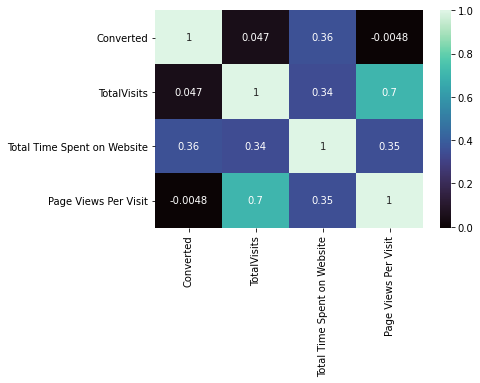

In [3347]:
sns.heatmap(Leads[["Converted","TotalVisits","Total Time Spent on Website","Page Views Per Visit"]].corr(),cmap="mako",annot=True)

# Secondary Data Summary

In [3348]:
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,Mumbai,No,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,Mumbai,No,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,Mumbai,No,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,Mumbai,No,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,Mumbai,No,No


In [3349]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8869 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               8869 non-null   object 
 1   Lead Number                               8869 non-null   int64  
 2   Lead Origin                               8869 non-null   object 
 3   Lead Source                               8869 non-null   object 
 4   Do Not Email                              8869 non-null   object 
 5   Do Not Call                               8869 non-null   object 
 6   Converted                                 8869 non-null   int64  
 7   TotalVisits                               8869 non-null   float64
 8   Total Time Spent on Website               8869 non-null   int64  
 9   Page Views Per Visit                      8869 non-null   float64
 10  Specialization                      

In [3350]:
Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8869.000000,8869.000000,8869.000000,8869.000000,8869.000000
mean,617053.676739,0.375578,3.180291,466.417747,2.269528
std,23316.804225,0.484299,2.999638,528.311110,1.893790
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596447.000000,0.000000,1.000000,6.000000,1.000000
50%,615429.000000,0.000000,3.000000,238.000000,2.000000
75%,637140.000000,1.000000,5.000000,887.000000,3.000000
max,660737.000000,1.000000,19.000000,1849.000000,9.000000


# Data Preparation for Modelling

In [3351]:
# Converting Binary categorical variables into 0/1

# Do Not Email
Leads["Do Not Email"].loc[Leads["Do Not Email"]=="No"]=0
Leads["Do Not Email"].loc[Leads["Do Not Email"]=="Yes"]=1
Leads["Do Not Email"]=Leads["Do Not Email"].astype("int64")

# A free copy of Mastering The Interview
Leads["A free copy of Mastering The Interview"].loc[Leads["A free copy of Mastering The Interview"]=="No"]=0
Leads["A free copy of Mastering The Interview"].loc[Leads["A free copy of Mastering The Interview"]=="Yes"]=1
Leads["A free copy of Mastering The Interview"]=Leads["A free copy of Mastering The Interview"].astype("int64")

In [3352]:
# Dropping Categorical variables that are highly skewed
Leads.drop(["Do Not Call","Magazine","Search","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"],axis=1,inplace=True)

### Creating Dummy Variables and concat with Leads df

In [3353]:
dummy=pd.get_dummies(Leads[["Specialization","What is your current occupation","City","Lead Source","Lead Origin"]])

In [3354]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8869 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Specialization_Banking, Investment And Insurance      8869 non-null   uint8
 1   Specialization_Business Administration                8869 non-null   uint8
 2   Specialization_Management_Specializations             8869 non-null   uint8
 3   Specialization_Media and Advertising                  8869 non-null   uint8
 4   Specialization_Others                                 8869 non-null   uint8
 5   Specialization_Travel and Tourism                     8869 non-null   uint8
 6   What is your current occupation_Other                 8869 non-null   uint8
 7   What is your current occupation_Others                8869 non-null   uint8
 8   What is your current occupation_Student               8869 non-null   uint8
 9

In [3355]:
dummy.drop(["Specialization_Others","Lead Source_Others","City_Other Cities","What is your current occupation_Other","Lead Origin_Lead Import"],axis=1,inplace=True)

In [3356]:
# Concat Dummy variables to Leads DF
Leads=pd.concat([Leads,dummy],axis=1)

# Dropping the original varibles in the Leads df
Leads.drop(["Specialization","Lead Source","City","What is your current occupation","Lead Origin"],axis=1,inplace=True)

In [3357]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8869 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           8869 non-null   object 
 1   Lead Number                                           8869 non-null   int64  
 2   Do Not Email                                          8869 non-null   int64  
 3   Converted                                             8869 non-null   int64  
 4   TotalVisits                                           8869 non-null   float64
 5   Total Time Spent on Website                           8869 non-null   int64  
 6   Page Views Per Visit                                  8869 non-null   float64
 7   A free copy of Mastering The Interview                8869 non-null   int64  
 8   Specialization_Banking, Investment And Insurance      8869

In [3358]:
# Copying the dataframe 
Leads_ml=Leads.drop(["Prospect ID","Lead Number"],axis=1)

# Creating a couple of polynomial features
Leads_ml["Website_traffic"]=Leads_ml["TotalVisits"]*Leads_ml["Total Time Spent on Website"]*Leads_ml["Page Views Per Visit"]
Leads_ml["TotalVisits * Total Time Spent on Website"]=Leads_ml["TotalVisits"]*Leads_ml["Total Time Spent on Website"]
Leads_ml["TotalVisits * Page Views Per Visit"]=Leads_ml["TotalVisits"]*Leads_ml["Page Views Per Visit"]
Leads_ml["Page Views Per Visit * Total Time Spent on Website"]=Leads_ml["Page Views Per Visit"]*Leads_ml["Total Time Spent on Website"]

In [3359]:
Leads_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8869 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          8869 non-null   int64  
 1   Converted                                             8869 non-null   int64  
 2   TotalVisits                                           8869 non-null   float64
 3   Total Time Spent on Website                           8869 non-null   int64  
 4   Page Views Per Visit                                  8869 non-null   float64
 5   A free copy of Mastering The Interview                8869 non-null   int64  
 6   Specialization_Banking, Investment And Insurance      8869 non-null   uint8  
 7   Specialization_Business Administration                8869 non-null   uint8  
 8   Specialization_Management_Specializations             8869

# Correlation

<AxesSubplot:>

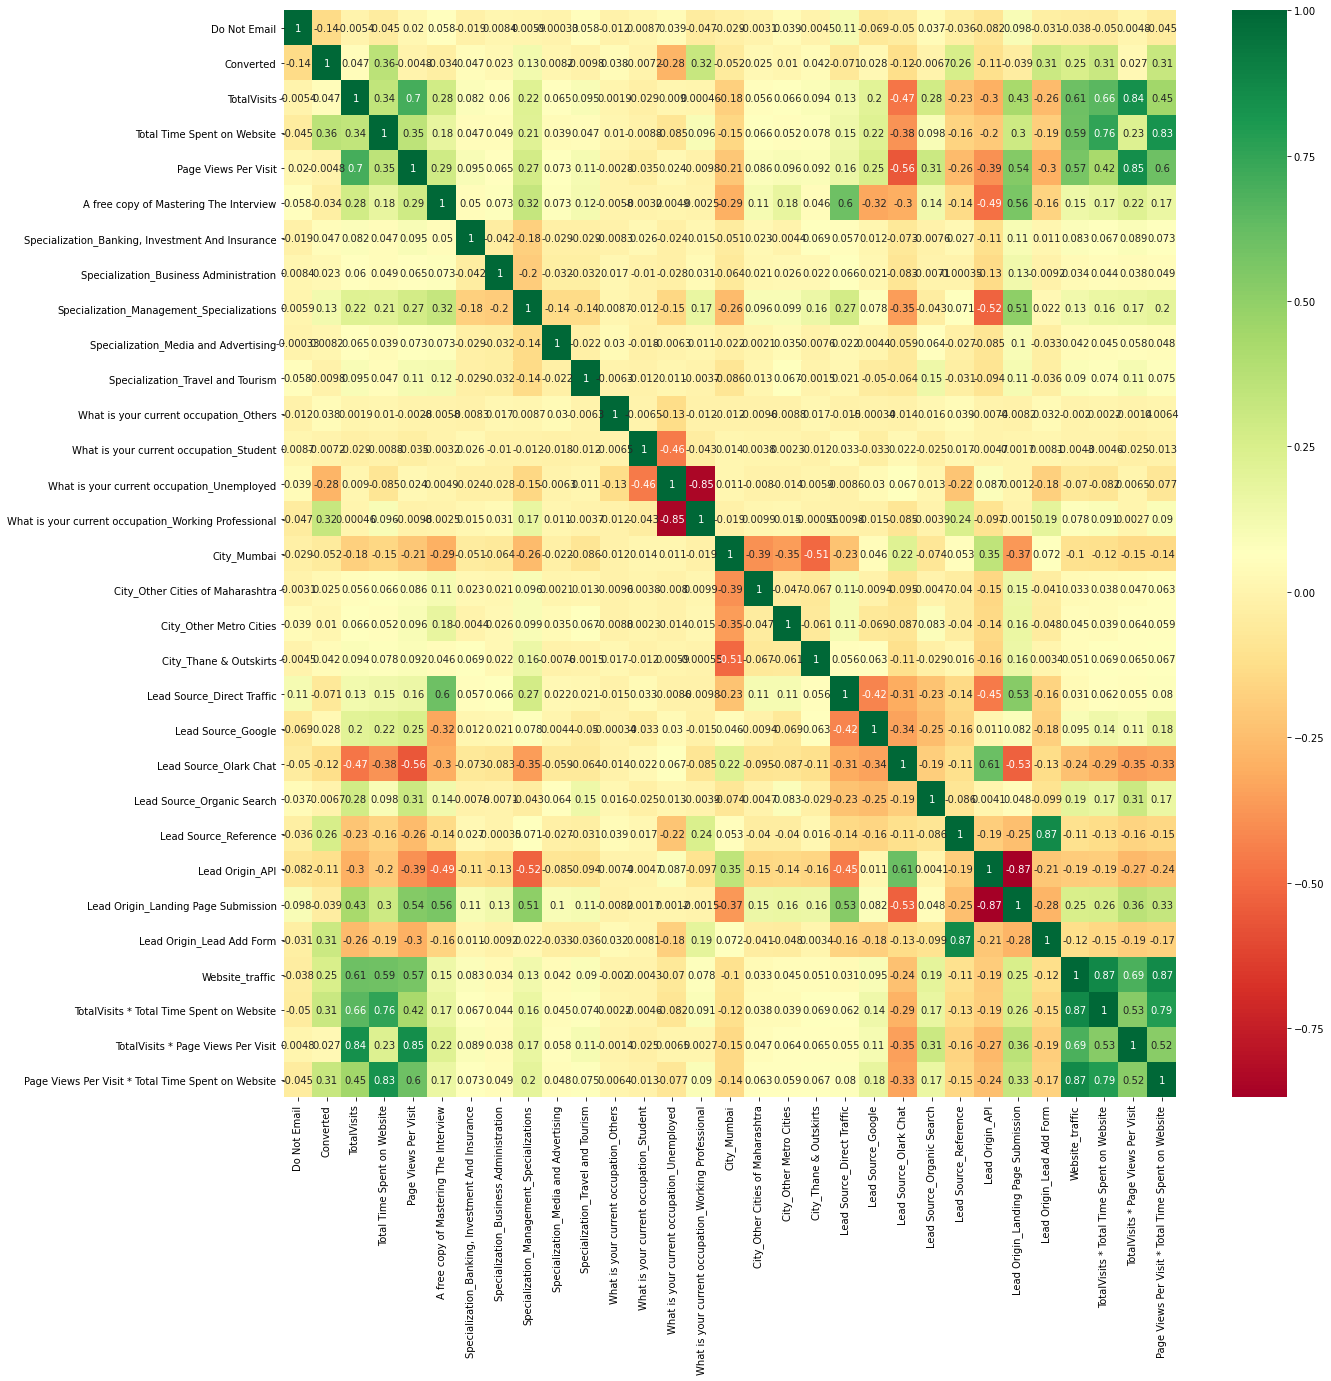

In [3360]:
plt.figure(figsize=[20,20])
sns.heatmap(Leads_ml.corr(),cmap="RdYlGn",annot=True)

# Train and Test Split

In [3361]:
# Creating the X and y Dataframes
X=Leads_ml
y=X.pop("Converted")

In [3362]:
# 70/30 Split into Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [3363]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Travel and Tourism,...,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Website_traffic,TotalVisits * Total Time Spent on Website,TotalVisits * Page Views Per Visit,Page Views Per Visit * Total Time Spent on Website
8337,0,0.0,0,0.0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.0,0.0,0.0,0.0
1930,0,4.0,1396,4.0,0,0,0,1,0,0,...,0,0,0,0,1,0,22336.0,5584.0,16.0,5584.0
1972,0,0.0,0,0.0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.0,0.0,0.0,0.0
4108,0,3.0,22,3.0,0,0,0,1,0,0,...,0,0,0,0,1,0,198.0,66.0,9.0,66.0
5885,0,0.0,0,0.0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.0,0.0,0.0,0.0


In [3364]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6208 entries, 8337 to 5877
Data columns (total 30 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6208 non-null   int64  
 1   TotalVisits                                           6208 non-null   float64
 2   Total Time Spent on Website                           6208 non-null   int64  
 3   Page Views Per Visit                                  6208 non-null   float64
 4   A free copy of Mastering The Interview                6208 non-null   int64  
 5   Specialization_Banking, Investment And Insurance      6208 non-null   uint8  
 6   Specialization_Business Administration                6208 non-null   uint8  
 7   Specialization_Management_Specializations             6208 non-null   uint8  
 8   Specialization_Media and Advertising                  6

# Feature Scaling

In [3365]:
# Standard scaling of the numerical variables of the training dataframe
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit',"Website_traffic","TotalVisits * Total Time Spent on Website","TotalVisits * Page Views Per Visit","Page Views Per Visit * Total Time Spent on Website"]] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit',"Website_traffic","TotalVisits * Total Time Spent on Website","TotalVisits * Page Views Per Visit","Page Views Per Visit * Total Time Spent on Website"]])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Travel and Tourism,...,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Website_traffic,TotalVisits * Total Time Spent on Website,TotalVisits * Page Views Per Visit,Page Views Per Visit * Total Time Spent on Website
8337,0,-1.062256,-0.878826,-1.190779,0,0,0,0,0,0,...,1,0,0,1,0,0,-0.516678,-0.657317,-0.742260,-0.722344
1930,0,0.280885,1.770288,0.910252,0,0,0,1,0,0,...,0,0,0,0,1,0,1.138384,1.182404,0.317823,2.172214
1972,0,-1.062256,-0.878826,-1.190779,0,0,0,0,0,0,...,1,0,0,1,0,0,-0.516678,-0.657317,-0.742260,-0.722344
4108,0,-0.054900,-0.837078,0.384994,0,0,0,1,0,0,...,0,0,0,0,1,0,-0.502006,-0.635573,-0.145963,-0.688131
5885,0,-1.062256,-0.878826,-1.190779,0,0,0,0,0,0,...,1,0,0,1,0,0,-0.516678,-0.657317,-0.742260,-0.722344


# ML model 

### Model 1 : The Precursor model

In [3366]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6208
Model:                            GLM   Df Residuals:                     6177
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2829.5
Date:                Mon, 14 Jun 2021   Deviance:                       5659.0
Time:                        03:25:20   Pearson chi2:                 6.87e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3475      0.965     -0.360      0.719      -2.238       1.543
Do Not Email                                            -1.4881      0.172     -8.633      0.000      -1.826      -1.150
TotalVisits                                              0.0545      0.121      0.449      0.653      -0.183       0.292
Total Time Spent on Website                              0.5173      0.131      3.942      0.000       0.260       0.775
Page Views Per Visit                                    -0.4066      0.146     -2.781      0.005      -0.693      -0.120
A free copy of Mastering The Interview                  -0.1771      0.106     -1.676      0.094      -0.384       0.030
Specialization_Banking, Investment And Insurance         1.0459      0.196      5.349      0.000       0.663       1.429
Specialization_Business Administration                   0.5998      0.188      3.185      0.001       0.231       0.969
Specialization_Management_Specializations                0.6856      0.105      6.523      0.000       0.480       0.892
Specialization_Media and Advertising                     0.7496      0.233      3.212      0.001       0.292       1.207
Specialization_Travel and Tourism                        0.3766      0.271      1.390      0.164      -0.154       0.907
What is your current occupation_Others                   0.2383      1.131      0.211      0.833      -1.978       2.454
What is your current occupation_Student                 -0.4733      0.803     -0.589      0.556      -2.047       1.100
What is your current occupation_Unemployed              -0.1801      0.769     -0.234      0.815      -1.687       1.327
What is your current occupation_Working Professional     2.6464      0.791      3.346      0.001       1.096       4.197
City_Mumbai                                             -0.2987      0.124     -2.406      0.016      -0.542      -0.055
City_Other Cities of Maharashtra                         0.0145      0.185      0.078      0.938      -0.348       0.377
City_Other Metro Cities                                  0.0691      0.195      0.354      0.724      -0.314       0.452
City_Thane & Outskirts                                  -0.2424      0.163     -1.487      0.137      -0.562       0.077
Lead Source_Direct Traffic                               0.3069      0.322      0.952      0.341      -0.325       0.939
Lead Source_Google                                       0.5115      0.310      1.648      0.099      -0.097       1.120
Lead Source_Olark Chat                                   1.0860      0.355      3.057      0.002       0.390       1.782
Lead Source_Organic Search                               0

### Feature Selection using RFE

In [3367]:
# Creating an instance
logreg = LogisticRegression()

# Rfe Selection
rfe = RFE(logreg, 15)           
rfe = rfe.fit(X_train, y_train)

# Display the accepted and rejected rfe features
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 14),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('A free copy of Mastering The Interview', False, 11),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', True, 1),
 ('Specialization_Management_Specializations', True, 1),
 ('Specialization_Media and Advertising', True, 1),
 ('Specialization_Travel and Tourism', False, 4),
 ('What is your current occupation_Others', False, 12),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Mumbai', False, 9),
 ('City_Other Cities of Maharashtra', False, 15),
 ('City_Other Metro Cities', False, 13),
 ('City_Thane & Outskirts', False, 10),
 ('Lead Source_Direct Traffic', False, 16),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Or

In [3368]:
col=X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Source_Olark Chat', 'Lead Source_Reference', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'TotalVisits * Total Time Spent on Website'],
      dtype='object')

### Model 2

In [3369]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6208
Model:                            GLM   Df Residuals:                     6192
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2854.7
Date:                Mon, 14 Jun 2021   Deviance:                       5709.4
Time:                        03:25:21   Pearson chi2:                 6.69e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0248      0.796     -0.031      0.975      -1.585       1.535
Do Not Email                                            -1.4743      0.170     -8.684      0.000      -1.807      -1.142
Total Time Spent on Website                              0.9229      0.054     17.099      0.000       0.817       1.029
Specialization_Banking, Investment And Insurance         0.9307      0.190      4.891      0.000       0.558       1.304
Specialization_Business Administration                   0.5600      0.181      3.087      0.002       0.204       0.916
Specialization_Management_Specializations                0.6382      0.096      6.635      0.000       0.450       0.827
Specialization_Media and Advertising                     0.7485      0.227      3.294      0.001       0.303       1.194
What is your current occupation_Student                 -0.7194      0.616     -1.167      0.243      -1.927       0.489
What is your current occupation_Unemployed              -0.3920      0.572     -0.685      0.493      -1.513       0.729
What is your current occupation_Working Professional     2.4307      0.601      4.045      0.000       1.253       3.608
Lead Source_Olark Chat                                   0.8910      0.112      7.969      0.000       0.672       1.110
Lead Source_Reference                                   -1.6320      0.636     -2.566      0.010      -2.879      -0.385
Lead Origin_API                                         -0.7801      0.557     -1.401      0.161      -1.872       0.312
Lead Origin_Landing Page Submission                     -1.2758      0.554     -2.302      0.021      -2.362      -0.189
Lead Origin_Lead Add Form                                4.8125      0.809      5.952      0.000       3.228       6.397
TotalVisits * Total Time Spent on Website                0.2796      0.055      5.078      0.000       0.172       0.388
========================================================================================================================
"""

In [3370]:
# Checking the VIF of the Training dataset

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,What is your current occupation_Unemployed,152.52
12,Lead Origin_Landing Page Submission,93.92
11,Lead Origin_API,68.30
13,Lead Origin_Lead Add Form,15.14
8,What is your current occupation_Working Profes...,13.51
6,What is your current occupation_Student,4.68
10,Lead Source_Reference,4.38
4,Specialization_Management_Specializations,3.77
1,Total Time Spent on Website,2.68
14,TotalVisits * Total Time Spent on Website,2.42


### Model 3

In [3371]:
# Dropping variable due to high vif
col=col.drop("What is your current occupation_Unemployed",1)

In [3372]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6208
Model:                            GLM   Df Residuals:                     6193
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2854.9
Date:                Mon, 14 Jun 2021   Deviance:                       5709.9
Time:                        03:25:21   Pearson chi2:                 6.69e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4176      0.552     -0.756      0.450      -1.500       0.665
Do Not Email                                            -1.4731      0.170     -8.684      0.000      -1.806      -1.141
Total Time Spent on Website                              0.9231      0.054     17.103      0.000       0.817       1.029
Specialization_Banking, Investment And Insurance         0.9314      0.190      4.893      0.000       0.558       1.304
Specialization_Business Administration                   0.5695      0.181      3.149      0.002       0.215       0.924
Specialization_Management_Specializations                0.6400      0.096      6.655      0.000       0.451       0.828
Specialization_Media and Advertising                     0.7540      0.227      3.326      0.001       0.310       1.198
What is your current occupation_Student                 -0.3287      0.235     -1.401      0.161      -0.789       0.131
What is your current occupation_Working Professional     2.8212      0.191     14.752      0.000       2.446       3.196
Lead Source_Olark Chat                                   0.8908      0.112      7.966      0.000       0.672       1.110
Lead Source_Reference                                   -1.6286      0.636     -2.561      0.010      -2.875      -0.382
Lead Origin_API                                         -0.7780      0.557     -1.397      0.163      -1.870       0.314
Lead Origin_Landing Page Submission                     -1.2763      0.554     -2.302      0.021      -2.363      -0.190
Lead Origin_Lead Add Form                                4.8135      0.809      5.953      0.000       3.229       6.398
TotalVisits * Total Time Spent on Website                0.2801      0.055      5.086      0.000       0.172       0.388
========================================================================================================================
"""

### Model 4

In [3373]:
# Dropping variable due to high p-value
col=col.drop("Lead Origin_API",1)

In [3374]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6208
Model:                            GLM   Df Residuals:                     6194
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2855.8
Date:                Mon, 14 Jun 2021   Deviance:                       5711.7
Time:                        03:25:21   Pearson chi2:                 6.69e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1839      0.077    -15.346      0.000      -1.335      -1.033
Do Not Email                                            -1.4738      0.170     -8.691      0.000      -1.806      -1.141
Total Time Spent on Website                              0.9188      0.054     17.064      0.000       0.813       1.024
Specialization_Banking, Investment And Insurance         0.9352      0.190      4.915      0.000       0.562       1.308
Specialization_Business Administration                   0.5767      0.181      3.195      0.001       0.223       0.931
Specialization_Management_Specializations                0.6464      0.096      6.724      0.000       0.458       0.835
Specialization_Media and Advertising                     0.7645      0.227      3.371      0.001       0.320       1.209
What is your current occupation_Student                 -0.3295      0.235     -1.405      0.160      -0.789       0.130
What is your current occupation_Working Professional     2.8252      0.191     14.775      0.000       2.450       3.200
Lead Source_Olark Chat                                   0.8749      0.111      7.877      0.000       0.657       1.093
Lead Source_Reference                                   -1.6312      0.636     -2.565      0.010      -2.878      -0.385
Lead Origin_Landing Page Submission                     -0.5139      0.106     -4.862      0.000      -0.721      -0.307
Lead Origin_Lead Add Form                                5.5760      0.598      9.317      0.000       4.403       6.749
TotalVisits * Total Time Spent on Website                0.2804      0.055      5.094      0.000       0.173       0.388
========================================================================================================================
"""

### Model 5

In [3375]:
# Dropping variable due to high p-value
col=col.drop("What is your current occupation_Student",1)

In [3376]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6208
Model:                            GLM   Df Residuals:                     6195
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2856.8
Date:                Mon, 14 Jun 2021   Deviance:                       5713.7
Time:                        03:25:21   Pearson chi2:                 6.68e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1893      0.077    -15.429      0.000      -1.340      -1.038
Do Not Email                                            -1.4741      0.169     -8.698      0.000      -1.806      -1.142
Total Time Spent on Website                              0.9176      0.054     17.043      0.000       0.812       1.023
Specialization_Banking, Investment And Insurance         0.9317      0.190      4.899      0.000       0.559       1.305
Specialization_Business Administration                   0.5779      0.180      3.202      0.001       0.224       0.932
Specialization_Management_Specializations                0.6469      0.096      6.735      0.000       0.459       0.835
Specialization_Media and Advertising                     0.7718      0.227      3.405      0.001       0.328       1.216
What is your current occupation_Working Professional     2.8318      0.191     14.815      0.000       2.457       3.206
Lead Source_Olark Chat                                   0.8706      0.111      7.843      0.000       0.653       1.088
Lead Source_Reference                                   -1.6389      0.636     -2.577      0.010      -2.886      -0.392
Lead Origin_Landing Page Submission                     -0.5159      0.106     -4.884      0.000      -0.723      -0.309
Lead Origin_Lead Add Form                                5.5803      0.598      9.324      0.000       4.407       6.753
TotalVisits * Total Time Spent on Website                0.2804      0.055      5.087      0.000       0.172       0.388
========================================================================================================================
"""

#### Performing Predictions to check the model

In [3377]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8337    0.212602
1930    0.710477
1972    0.212602
4108    0.118732
5885    0.212602
327     0.675996
5436    0.058229
7518    0.212602
5797    0.994728
4474    0.030659
dtype: float64

In [3378]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21260179, 0.71047723, 0.21260179, 0.11873221, 0.21260179,
       0.67599567, 0.0582294 , 0.21260179, 0.99472822, 0.03065856])

In [3379]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.212602,8337
1,1,0.710477,1930
2,0,0.212602,1972
3,0,0.118732,4108
4,0,0.212602,5885


In [3380]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.212602,8337,0
1,1,0.710477,1930,1
2,0,0.212602,1972,0
3,0,0.118732,4108,0
4,0,0.212602,5885,0


In [3381]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3486  403]
 [ 851 1468]]


In [3382]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7980025773195877


##### Accuracy of model : 79.80 %

### Model 6

In [3383]:
# Dropping variable due to high p-value
col=col.drop("Lead Source_Reference",1)

In [3384]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6208
Model:                            GLM   Df Residuals:                     6196
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2861.4
Date:                Mon, 14 Jun 2021   Deviance:                       5722.9
Time:                        03:25:21   Pearson chi2:                 6.77e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1850      0.077    -15.387      0.000      -1.336      -1.034
Do Not Email                                            -1.4687      0.169     -8.710      0.000      -1.799      -1.138
Total Time Spent on Website                              0.9173      0.054     17.046      0.000       0.812       1.023
Specialization_Banking, Investment And Insurance         0.9099      0.191      4.774      0.000       0.536       1.283
Specialization_Business Administration                   0.5602      0.181      3.103      0.002       0.206       0.914
Specialization_Management_Specializations                0.6268      0.096      6.529      0.000       0.439       0.815
Specialization_Media and Advertising                     0.7541      0.227      3.325      0.001       0.310       1.199
What is your current occupation_Working Professional     2.8270      0.191     14.782      0.000       2.452       3.202
Lead Source_Olark Chat                                   0.8693      0.111      7.838      0.000       0.652       1.087
Lead Origin_Landing Page Submission                     -0.5025      0.106     -4.762      0.000      -0.709      -0.296
Lead Origin_Lead Add Form                                4.3366      0.231     18.774      0.000       3.884       4.789
TotalVisits * Total Time Spent on Website                0.2807      0.055      5.094      0.000       0.173       0.389
========================================================================================================================
"""

#### Performing Predictions to check the model

In [3385]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8337    0.213099
1930    0.709930
1972    0.213099
4108    0.118466
5885    0.213099
327     0.672564
5436    0.058690
7518    0.213099
5797    0.996369
4474    0.030946
dtype: float64

In [3386]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21309893, 0.70992981, 0.21309893, 0.11846619, 0.21309893,
       0.67256423, 0.0586903 , 0.21309893, 0.99636915, 0.03094649])

In [3387]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.213099,8337
1,1,0.709930,1930
2,0,0.213099,1972
3,0,0.118466,4108
4,0,0.213099,5885


In [3388]:
##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.213099,8337,0
1,1,0.709930,1930,1
2,0,0.213099,1972,0
3,0,0.118466,4108,0
4,0,0.213099,5885,0


In [3389]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3486  403]
 [ 850 1469]]


In [3390]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7981636597938144


##### Accuracy of model : 79.82 %

We can see that the accuracy has stated to plateau

# Metrics beyond simply accuracy
- Sensitivity
- Specificity
- Postitive Prediciton value
- Negative Prediction value

In [3391]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [3392]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6334626994394136

In [3393]:
# Let us calculate specificity
TN / float(TN+FP)

0.8963743893031628

In [3394]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10362561069683723


In [3395]:
# positive predictive value 
print (TP / float(TP+FP))

0.7847222222222222


In [3396]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8039667896678967


### ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [3397]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [3398]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

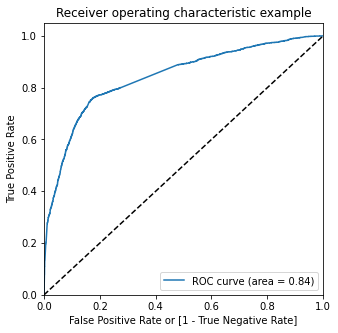

In [3399]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Threshold

Optimal Threshold is that prob where we get balanced sensitivity and specificity

In [3400]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.213099,8337,0,1,1,1,0,0,0,0,0,0,0
1,1,0.709930,1930,1,1,1,1,1,1,1,1,1,0,0
2,0,0.213099,1972,0,1,1,1,0,0,0,0,0,0,0
3,0,0.118466,4108,0,1,1,0,0,0,0,0,0,0,0
4,0,0.213099,5885,0,1,1,1,0,0,0,0,0,0,0


In [3401]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.373550  1.000000  0.000000
0.1   0.1  0.442977  0.987495  0.118282
0.2   0.2  0.642719  0.893057  0.493443
0.3   0.3  0.800258  0.761104  0.823605
0.4   0.4  0.802513  0.695127  0.866547
0.5   0.5  0.798164  0.633463  0.896374
0.6   0.6  0.784633  0.552393  0.923116
0.7   0.7  0.760148  0.442001  0.949859
0.8   0.8  0.737113  0.340233  0.973772
0.9   0.9  0.698454  0.204830  0.992800


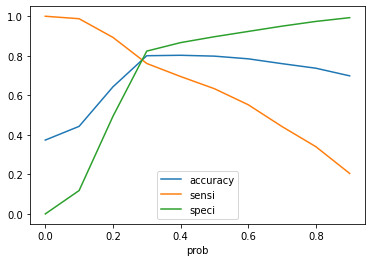

In [3402]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### Optimal Threshold for the classification: 0.3

### Performing Predictions with Threshold as 0.3

In [3403]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.213099,8337,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.709930,1930,1,1,1,1,1,1,1,1,1,0,0,1
2,0,0.213099,1972,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.118466,4108,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.213099,5885,0,1,1,1,0,0,0,0,0,0,0,0


In [3404]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8002577319587629

In [3405]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3203,  686],
       [ 554, 1765]])

In [3406]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [3407]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7611039241052178

In [3408]:
# Let us calculate specificity
TN / float(TN+FP)

0.8236050398560041

In [3409]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1763949601439959


In [3410]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7201142390860873


In [3411]:
# Negative predictive value
print (TN / float(TN+ FN))

0.852541921746074


### Precision and Recall

In [3412]:
#Looking at the confusion matrix again

In [3413]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3486,  403],
       [ 850, 1469]])

#### Precision
TP / TP + FP

In [3414]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7847222222222222

#### Recall
TP / TP + FN

In [3415]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6334626994394136

Using sklearn utilities for the same

In [3416]:
from sklearn.metrics import precision_score, recall_score

In [3417]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7847222222222222

In [3418]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.6334626994394136

#### Precision and recall tradeoff

In [3419]:
from sklearn.metrics import precision_recall_curve

In [3420]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6203    0
 6204    1
 6205    0
 6206    1
 6207    0
 Name: Converted, Length: 6208, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6203    0
 6204    1
 6205    0
 6206    1
 6207    1
 Name: Predicted, Length: 6208, dtype: int64)

In [3421]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

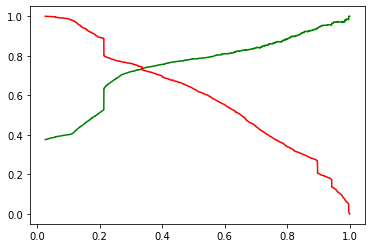

In [3422]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Making predictions on the test set

In [3423]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit',"Website_traffic","TotalVisits * Total Time Spent on Website","TotalVisits * Page Views Per Visit","Page Views Per Visit * Total Time Spent on Website"]] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit',"Website_traffic","TotalVisits * Total Time Spent on Website","TotalVisits * Page Views Per Visit","Page Views Per Visit * Total Time Spent on Website"]])



In [3424]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Management_Specializations,Specialization_Media and Advertising,What is your current occupation_Working Professional,Lead Source_Olark Chat,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,TotalVisits * Total Time Spent on Website
1351,0,-0.286354,1,0,0,0,0,0,1,0,-0.250825
7229,0,1.396465,0,0,1,0,0,0,1,0,0.860655
6680,0,-0.484000,0,0,1,0,0,0,1,0,0.225656
5260,0,0.743290,0,0,0,0,0,1,0,0,3.940536
5338,1,-0.453883,0,0,1,0,0,0,1,0,-0.361476


In [3425]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [3426]:
y_test_pred = res.predict(X_test_sm)

In [3427]:
y_test_pred[:10]

1351    0.247741
7229    0.613444
6680    0.191330
5260    0.813416
5338    0.045337
5143    0.125903
247     0.147421
4930    0.704619
2696    0.895681
7113    0.880542
dtype: float64

In [3428]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [3429]:
# Let's see the head
y_pred_1.head()

,0
1351,0.247741
7229,0.613444
6680,0.191330
5260,0.813416
5338,0.045337


In [3430]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [3431]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [3432]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [3433]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [3434]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,1351,0.247741
1,1,7229,0.613444
2,0,6680,0.191330
3,0,5260,0.813416
4,0,5338,0.045337


In [3435]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [3436]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID',"Converted",'Converted_Prob']]

In [3437]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,1351,0,0.247741
1,7229,1,0.613444
2,6680,0,0.191330
3,5260,0,0.813416
4,5338,0,0.045337


In [3438]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [3439]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,1351,0,0.247741,0
1,7229,1,0.613444,1
2,6680,0,0.191330,0
3,5260,0,0.813416,1
4,5338,0,0.045337,0


In [3440]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7970687711386697

In [3441]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1379,  270],
       [ 270,  742]])

In [3442]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [3443]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.733201581027668

In [3444]:
# Let us calculate specificity
TN / float(TN+FP)

0.8362644026682838

# Final Observation:
Let us compare the values obtained for Train & Test:

### Train Data: 
- Accuracy    : 80.02%
- Sensitivity : 76.11%
- Specificity : 82.36%

### Test Data: 
- Accuracy    : 79.70%
- Sensitivity : 73.32%
- Specificity : 83.62%